In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, zscore

In [8]:
# Step 1: Load the data
df = pd.read_csv("bhp.csv")
df = df.dropna(subset=['price_per_sqft'])  

In [9]:
# Step 2: Remove outliers using percentile technique
low, high = df['price_per_sqft'].quantile([0.001, 0.999])
df_percentile_filtered = df[(df['price_per_sqft'] >= low) & (df['price_per_sqft'] <= high)]

print("Shape after percentile filtering:", df_percentile_filtered.shape)

Shape after percentile filtering: (998, 1)


In [10]:
# Step 3: Remove outliers using 4 standard deviation technique
mean = df_percentile_filtered['price_per_sqft'].mean()
std_dev = df_percentile_filtered['price_per_sqft'].std()

df_std_filtered = df_percentile_filtered[
    (df_percentile_filtered['price_per_sqft'] >= (mean - 4 * std_dev)) &
    (df_percentile_filtered['price_per_sqft'] <= (mean + 4 * std_dev))
]

print("Shape after 4-STD filtering:", df_std_filtered.shape)

Shape after 4-STD filtering: (989, 1)


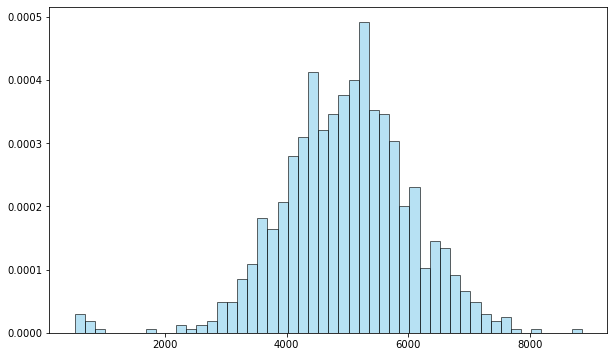

In [14]:
# Step 4: Plot histogram + bell curve
plt.figure(figsize=(10,6))
count, bins, ignored = plt.hist(df_std_filtered['price_per_sqft'], bins=50, density=True, alpha=0.6, color='skyblue', edgecolor='black')

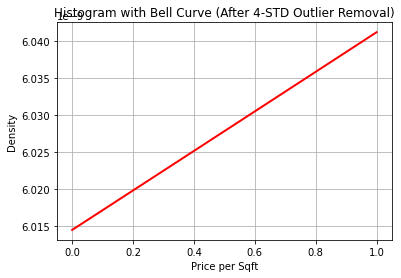

In [15]:
# Plotting the bell curve
mu, sigma = df_std_filtered['price_per_sqft'].mean(), df_std_filtered['price_per_sqft'].std()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'r', linewidth=2)
plt.title('Histogram with Bell Curve (After 4-STD Outlier Removal)')
plt.xlabel('Price per Sqft')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [16]:
# Step 5: Z-score filtering with threshold 4
df_zscore_filtered = df_percentile_filtered[(np.abs(zscore(df_percentile_filtered['price_per_sqft'])) < 4)]

print("Shape after Z-score filtering (threshold=4):", df_zscore_filtered.shape)

Shape after Z-score filtering (threshold=4): (989, 1)
